In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
items = pd.read_csv('olist_order_items_dataset.csv')
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Сколько пользователей, которые совершили покупку только один раз?

In [5]:
#присоединить customer_unique_id к таблице orders
order_customers = orders.merge(customers, how='left', on = 'customer_id')
order_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [6]:
#посмотрим, сколько всего уникальных покупателей
order_customers['customer_unique_id'].nunique()

96096

In [7]:
# "совершили покупку" может означать, что покупатель оплатил товар и ждет заказ, из статусов заказов подходят категории "в процессе сборки заказа", "отгружен со склада" и "доставлен" 
only_one = order_customers\
.query('order_status == ["processing", "shipped", "delivered"]')\
.groupby('customer_unique_id', as_index=False)\
.agg({'order_id': 'nunique'})\
.rename(columns={'order_id':'number_of_orders'})
only_one

,customer_unique_id,number_of_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
94681,fffcf5a5ff07b0908bd4e2dbc735a684,1
94682,fffea47cd6d3cc0a88bd621562a9d061,1
94683,ffff371b4d645b6ecea244b27531430a,1
94684,ffff5962728ec6157033ef9805bacc48,1


In [47]:
#оставим только тех, кто совершил 1 заказ
task_1 = only_one.query('number_of_orders == 1').shape[0]
task_1

91814

### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [9]:
#статусы заказов
order_status = orders\
.groupby('order_status', as_index = False)\
.agg({'order_id': 'count'})\
.sort_values('order_id')
order_status

,order_status,order_id
0,approved,2
2,created,5
5,processing,301
4,invoiced,314
7,unavailable,609
1,canceled,625
6,shipped,1107
3,delivered,96478


In [10]:
#привели колонки с датой к формату "datetime64[ns]"
date_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
order_customers[date_columns] = order_customers[date_columns].astype("datetime64[ns]")


In [11]:
# создали колонку с месяцем и годом
order_customers["year_month"] = order_customers["order_purchase_timestamp"].dt.to_period("M")
order_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02


In [55]:
# недоставленные товары - "canceled" и "unavailable"

not_delivered = order_customers\
.query('order_status == "canceled" | order_status == "unavailable"')\
.groupby(['year_month', 'order_status'], as_index=False)\
.agg({'order_id':'count'})\
.groupby('order_status', as_index=False)\
.order_id.mean()
not_delivered

,order_status,order_id
0,canceled,26.041667
1,unavailable,29.000000


In [56]:
# ответ
not_delivered

,order_status,order_id
0,canceled,26.041667
1,unavailable,29.000000


### По каждому товару определить, в какой день недели товар чаще всего покупается

In [14]:
week_item = items.merge(order_customers, how='left', on = 'order_id').drop(columns=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
week_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02


In [15]:
#определили день недели
week_item["weekday"] = week_item["order_purchase_timestamp"].dt.day_name()
week_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_month,weekday
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02,Saturday


In [16]:
#проверка на наличие пустых значений
week_item.weekday.isna().sum()

0

In [61]:
week_order=week_item\
.groupby(['product_id', 'weekday'], as_index=False)\
.agg({'order_id': 'count'})\
.rename(columns={'order_id':'number_of_orders'})\
.sort_values('number_of_orders', ascending=False)\
.groupby('product_id')\
.head(1)
week_order

,product_id,weekday,number_of_orders
15902,422879e10f46682990de24d770e7f83d,Wednesday,93
36513,99a4788cb24856965c36a24e339b6058,Monday,92
41045,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
20127,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
13537,389d119b48cf3043d311335e499d9c6b,Thursday,67
...,...,...,...
24030,6432d844f2be41bb6f2fd279e23415da,Friday,1
24009,6421ae053bb80dff3ceae1f217f54ed4,Monday,1
24010,642247ccf62585635cefa1bf09f59b94,Sunday,1
24022,642e125cbc752b4eeb8faf442319c39f,Thursday,1


In [62]:
# ответ
week_order[['product_id', 'weekday']]

,product_id,weekday
15902,422879e10f46682990de24d770e7f83d,Wednesday
36513,99a4788cb24856965c36a24e339b6058,Monday
41045,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday
20127,53b36df67ebb7c41585e8d54d6772e08,Tuesday
13537,389d119b48cf3043d311335e499d9c6b,Thursday
...,...,...
24030,6432d844f2be41bb6f2fd279e23415da,Friday
24009,6421ae053bb80dff3ceae1f217f54ed4,Monday
24010,642247ccf62585635cefa1bf09f59b94,Sunday
24022,642e125cbc752b4eeb8faf442319c39f,Thursday


### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель.  Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. 

In [18]:
# смотрим название месяца
week_item['month']=week_item["order_purchase_timestamp"].dt.month_name()
week_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_month,weekday,month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09,Wednesday,September
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04,Wednesday,April
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01,Sunday,January
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08,Wednesday,August
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02,Saturday,February


In [19]:
# определяем сколько недель в каждом месяце
week_item['number_of_weeks']=(week_item["order_purchase_timestamp"].dt.days_in_month / 7).round(2)
week_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_month,weekday,month,number_of_weeks
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09,Wednesday,September,4.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04,Wednesday,April,4.29
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01,Sunday,January,4.43
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08,Wednesday,August,4.43
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02,Saturday,February,4.00


In [20]:
#количество заказов у каждого покупателя по месяцам
orders_by_month = week_item\
.groupby(['customer_unique_id', 'month', 'number_of_weeks'], as_index=False)\
.agg({'order_id': 'count'})\
.rename(columns={'order_id':'number_of_orders'})
orders_by_month

,customer_unique_id,month,number_of_weeks,number_of_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,May,4.43,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,May,4.43,1
2,0000f46a3911fa3c0805444483337064,March,4.43,1
3,0000f6ccb0745a6a4b88665a16c9f078,October,4.43,1
4,0004aac84e0df4da2b147fca70cf8255,November,4.29,1
...,...,...,...,...
97271,fffcf5a5ff07b0908bd4e2dbc735a684,June,4.29,2
97272,fffea47cd6d3cc0a88bd621562a9d061,December,4.43,1
97273,ffff371b4d645b6ecea244b27531430a,February,4.00,1
97274,ffff5962728ec6157033ef9805bacc48,May,4.43,1


In [21]:
#среднее количество покупок
orders_by_month['avg_orders']= orders_by_month['number_of_orders'] / orders_by_month['number_of_weeks']
orders_by_month

,customer_unique_id,month,number_of_weeks,number_of_orders,avg_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,May,4.43,1,0.225734
1,0000b849f77a49e4a4ce2b2a4ca5be3f,May,4.43,1,0.225734
2,0000f46a3911fa3c0805444483337064,March,4.43,1,0.225734
3,0000f6ccb0745a6a4b88665a16c9f078,October,4.43,1,0.225734
4,0004aac84e0df4da2b147fca70cf8255,November,4.29,1,0.233100
...,...,...,...,...,...
97271,fffcf5a5ff07b0908bd4e2dbc735a684,June,4.29,2,0.466200
97272,fffea47cd6d3cc0a88bd621562a9d061,December,4.43,1,0.225734
97273,ffff371b4d645b6ecea244b27531430a,February,4.00,1,0.250000
97274,ffff5962728ec6157033ef9805bacc48,May,4.43,1,0.225734


### Используя pandas, провести когортный анализ пользователей. В период с января по декабрь выявить когорту с самым высоким retention на 3й месяц.

In [22]:
# ищем месяц и год первой покупки каждого пользователя 
first_order = order_customers\
.groupby('customer_unique_id', as_index=False)\
.agg({'year_month': 'min'})\
.rename(columns={'year_month':'first_order'})\
.sort_values('first_order')
first_order

,customer_unique_id,first_order
27245,4854e9b3feff728c13ee5fc7d1547e92,2016-09
69097,b7d76e111c89f7ebf14761390f0f7d17,2016-09
238,009b0127b727ab0ba422f6d9604487c7,2016-09
49312,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09
37428,6360ff9a3d58800ba0b03b1c6c290d92,2016-10
...,...,...
72940,c1ee153508c6b785b491443a95ff364e,2018-09
58524,9bb92bebd4cb7511e1a02d5e50bc4655,2018-09
56519,968fac81e2c44fb6c1e3ac2a45e6a102,2018-09
3583,09687a7b7431a93b5c53b50ba779bf94,2018-09


In [23]:
# добавить дату первой покупки в таблицу
orders_merged=order_customers.merge(first_order, how='inner', on='customer_unique_id')
orders_merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_month,first_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-09
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09,2017-09
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018-07
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018-08
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017-11


In [24]:
#формируем когорты: берем пользователей, совершивших покупку, отбираем тех, кто впервые заказывал в период с января по декабрь 2017
cohort_groups = orders_merged\
.query('order_status == ["processing", "shipped", "delivered"]')\
.query('"2017-01"<= first_order <= "2017-12" ')\
.groupby(['first_order', 'year_month'])\
.agg({'customer_unique_id': 'count'})\
.rename(columns={'customer_unique_id': 'all_clients'})

cohort_groups

all_clients
first_order year_month             
2017-01     2017-01             774
            2017-02               3
            2017-03               2
            2017-04               1
            2017-05               3
...                             ...
2017-12     2018-04              15
            2018-05              11
            2018-06               9
            2018-07               3
            2018-08              12

[171 rows x 1 columns]

In [25]:
#определим функцию, которая будет считать когорту 
def cohort_period(i):
     i['cohort_period'] = np.arange(len(i)) + 1
     return i
cohort_groups = cohort_groups.groupby(level=0).apply(cohort_period)
cohort_groups


all_clients  cohort_period
first_order year_month                            
2017-01     2017-01             774              1
            2017-02               3              2
            2017-03               2              3
            2017-04               1              4
            2017-05               3              5
...                             ...            ...
2017-12     2018-04              15              5
            2018-05              11              6
            2018-06               9              7
            2018-07               3              8
            2018-08              12              9

[171 rows x 2 columns]

In [26]:
cohort_groups = cohort_groups.reset_index()

In [27]:
cohort_table= cohort_groups.pivot(index='first_order', columns = 'cohort_period', values = 'all_clients')

In [28]:
cohort_table

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
first_order,,,,,,,,,,,,,,,,,,
2017-01,774.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1703.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,5.0
2017-03,2608.0,14.0,9.0,12.0,9.0,4.0,4.0,8.0,9.0,2.0,9.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0
2017-04,2341.0,15.0,6.0,5.0,8.0,6.0,9.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,6.0,NaN
2017-05,3595.0,19.0,19.0,14.0,11.0,14.0,17.0,6.0,9.0,11.0,9.0,12.0,10.0,1.0,8.0,11.0,NaN,NaN
2017-06,3149.0,15.0,12.0,12.0,8.0,11.0,12.0,7.0,4.0,7.0,10.0,10.0,5.0,4.0,7.0,NaN,NaN,NaN
2017-07,3885.0,22.0,14.0,10.0,13.0,8.0,12.0,4.0,8.0,11.0,9.0,12.0,5.0,10.0,NaN,NaN,NaN,NaN
2017-08,4187.0,30.0,16.0,11.0,15.0,24.0,12.0,11.0,6.0,6.0,10.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-09,4128.0,28.0,22.0,16.0,18.0,13.0,9.0,10.0,12.0,7.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#посчитаем retention
retention = cohort_table.div(cohort_table[1],axis=0).round(4)
retention

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
first_order,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.0039,0.0026,0.0013,0.0039,0.0013,0.0039,0.0013,0.0013,0.0039,0.0013,0.0065,0.0039,0.0013,0.0013,0.0026,0.0039,0.0013
2017-02,1.0,0.0023,0.0029,0.0012,0.0041,0.0012,0.0023,0.0018,0.0018,0.0023,0.0012,0.0029,0.0018,0.0018,0.0012,0.0006,0.0006,0.0029
2017-03,1.0,0.0054,0.0035,0.0046,0.0035,0.0015,0.0015,0.0031,0.0035,0.0008,0.0035,0.0012,0.0023,0.0012,0.0015,0.0023,0.0008,0.0015
2017-04,1.0,0.0064,0.0026,0.0021,0.0034,0.0026,0.0038,0.0030,0.0030,0.0017,0.0026,0.0009,0.0009,0.0004,0.0009,0.0009,0.0026,NaN
2017-05,1.0,0.0053,0.0053,0.0039,0.0031,0.0039,0.0047,0.0017,0.0025,0.0031,0.0025,0.0033,0.0028,0.0003,0.0022,0.0031,NaN,NaN
2017-06,1.0,0.0048,0.0038,0.0038,0.0025,0.0035,0.0038,0.0022,0.0013,0.0022,0.0032,0.0032,0.0016,0.0013,0.0022,NaN,NaN,NaN
2017-07,1.0,0.0057,0.0036,0.0026,0.0033,0.0021,0.0031,0.0010,0.0021,0.0028,0.0023,0.0031,0.0013,0.0026,NaN,NaN,NaN,NaN
2017-08,1.0,0.0072,0.0038,0.0026,0.0036,0.0057,0.0029,0.0026,0.0014,0.0014,0.0024,0.0019,0.0010,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.0068,0.0053,0.0039,0.0044,0.0031,0.0022,0.0024,0.0029,0.0017,0.0027,0.0007,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# определим самый высокий retention на 3 месяц
max_retention_3 = retention[retention[3] == retention[3].max()].index
max_retention_3

PeriodIndex(['2017-05', '2017-09'], dtype='period[M]', name='first_order', freq='M')

Text(173.0, 0.5, 'Date of the first order')

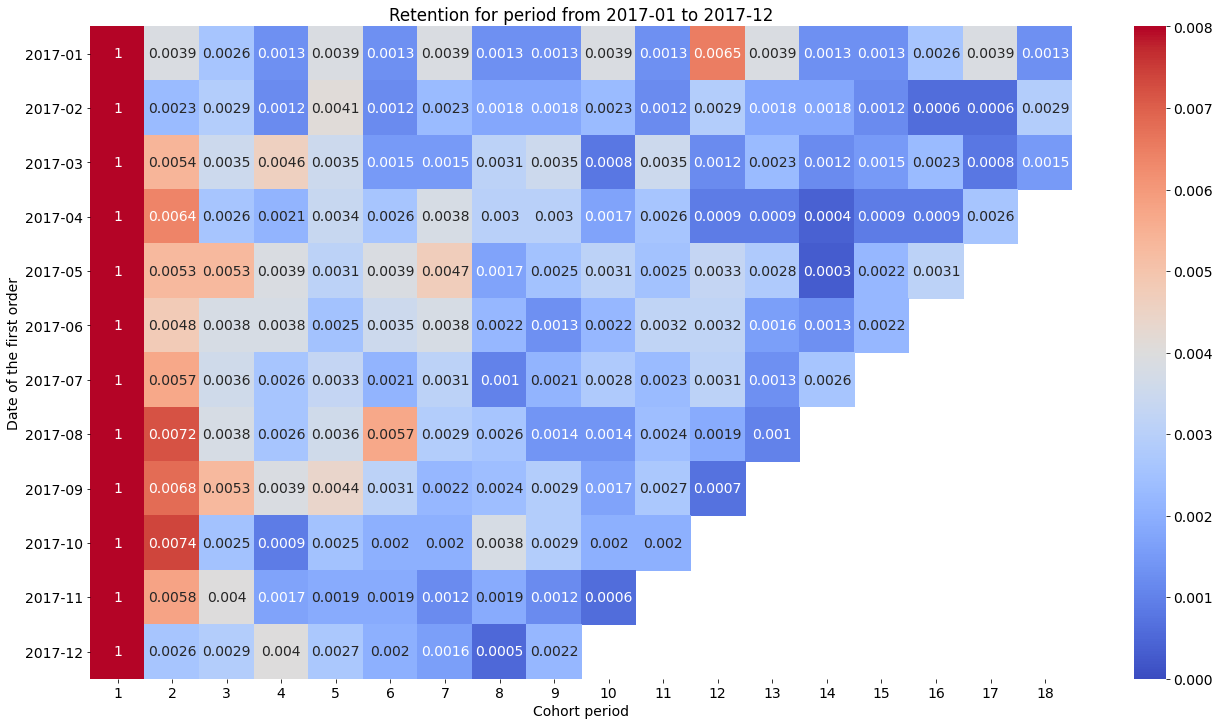

In [31]:
# визуализация с помощью тепловой карты
plt.figure(figsize=(22, 12))
plt.rcParams['font.size'] = '14'
sns.heatmap(retention, annot=True, vmin = 0.0, vmax=0.008 ,cmap='coolwarm')
plt.title('Retention for period from 2017-01 to 2017-12')
plt.xlabel('Cohort period')
plt.ylabel('Date of the first order')


### Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: 
R - время от последней покупки пользователя до текущей даты,  
F - суммарное количество покупок у пользователя за всё время,  
M - сумма покупок за всё время.

In [32]:
#объединим таблицы 
total_df = order_customers.merge(items, how='inner', on='order_id')\
        .drop(columns=[ 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                   'customer_zip_code_prefix', 'customer_city', 'customer_state', 'seller_id', 'shipping_limit_date', 'freight_value'])      
total_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,customer_unique_id,year_month,order_item_id,product_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,7c396fd4830fd04220f754e42b4e5bff,2017-10,1,87285b34884572647811a353c7ac498a,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231,2018-07,1,595fac2a385ac33a80bd5114aec74eb8,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,1,aa4383b373c6aca5d8797843e5594415,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977,2017-11,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90


In [33]:
#проверка на наличие пустых значений
total_df.isna().sum()

order_id                     0
customer_id                  0
order_status                 0
order_purchase_timestamp     0
order_approved_at           15
customer_unique_id           0
year_month                   0
order_item_id                0
product_id                   0
price                        0
dtype: int64

In [34]:
# удалим пустые значения
total_df.dropna()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,customer_unique_id,year_month,order_item_id,product_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,7c396fd4830fd04220f754e42b4e5bff,2017-10,1,87285b34884572647811a353c7ac498a,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231,2018-07,1,595fac2a385ac33a80bd5114aec74eb8,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,1,aa4383b373c6aca5d8797843e5594415,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977,2017-11,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90
...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,da62f9e57a76d978d02ab5362c509660,2018-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,737520a9aad80b3fbbdad19b66b37b30,2017-08,1,b80910977a37536adeddd63663f916ad,205.99
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,5097a5312c8b157bb7be58ae360ef43c,2018-01,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,5097a5312c8b157bb7be58ae360ef43c,2018-01,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99


In [35]:
# в сегменты будем определять тех пользователей, которые совершили покупку. 
# Подходит колонка 'order_approved_at' (время подтверждения оплаты заказа) - то есть пользователь уже заплатил и ждет заказ
# привели колонку 'order_approved_at' к формату даты
total_df['order_approved_at'] = pd.to_datetime(total_df['order_approved_at'])


In [36]:
# для расчета recency определим последнюю дату заказа +1 день, будем считать ее за текущую дату
current_date= total_df['order_approved_at'].max() + timedelta(days=1)
print(current_date)

2018-09-04 17:40:06


In [37]:
# посмотрим, сколько денег принес каждый покупатель за все время
rfm_df = total_df\
.groupby('customer_unique_id', as_index=False)\
.agg({'order_approved_at': lambda x: (current_date - x.max()).days,
    'order_id' : 'count',
    'price': 'sum'})\
.rename(columns={'order_approved_at' : 'recency',
                'order_id': 'frequency',
                 'price' : 'monetary' })
rfm_df

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117.0,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119.0,1,18.90
2,0000f46a3911fa3c0805444483337064,542.0,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326.0,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293.0,1,180.00
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,452.0,2,1570.00
95416,fffea47cd6d3cc0a88bd621562a9d061,267.0,1,64.89
95417,ffff371b4d645b6ecea244b27531430a,574.0,1,89.90
95418,ffff5962728ec6157033ef9805bacc48,125.0,1,115.00


In [38]:
# для того, чтобы создать кластеры, для определения их границ можно взять квинтили:

quantiles = rfm_df.quantile(q=[0.20,0.40,0.60,0.80])
quantiles

,recency,frequency,monetary
0.2,98.0,1.0,39.9
0.4,182.0,1.0,69.9
0.6,273.0,1.0,109.9
0.8,389.0,1.0,179.9


In [39]:
quantiles = quantiles.to_dict()
segmented_rfm = rfm_df

In [40]:
#Для выставления оценок нужно создать функцию. При этом, показатель recency чем больше, тем хуже (значит, пользователь что-то покупал очень давно)
# поэтому у него выставление оценок будет проихводиться наоборот (5 - recency <= 99 дней, 4 - recency от 100 до 183 дней и т.д.)
# В случае с  monetary ранжирование будет производиться по возрастанию

def r_score(x,p,d):
    if x <= d[p][0.20]:
        return 5
    elif x <= d[p][0.40]:
        return 4
    elif x <= d[p][0.60]: 
        return 3
    elif x <= d[p][0.80]: 
        return 2
    else:
        return 1
    
def m_score(x,p,d):
     if x <= d[p][0.20]:
        return 1
     elif x <= d[p][0.40]:
        return 2
     elif x <= d[p][0.60]: 
        return 3
     elif x<=d[p][0.80]:
        return 4
     else:
        return 5

segmented_rfm['R'] = segmented_rfm['recency'].apply(r_score, args=('recency',quantiles,))
segmented_rfm['M'] = segmented_rfm['monetary'].apply(m_score, args=('monetary',quantiles,))
segmented_rfm

,customer_unique_id,recency,frequency,monetary,R,M
0,0000366f3b9a7992bf8c76cfdf3221e2,117.0,1,129.90,4,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119.0,1,18.90,4,1
2,0000f46a3911fa3c0805444483337064,542.0,1,69.00,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,326.0,1,25.99,2,1
4,0004aac84e0df4da2b147fca70cf8255,293.0,1,180.00,2,5
...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,452.0,2,1570.00,1,5
95416,fffea47cd6d3cc0a88bd621562a9d061,267.0,1,64.89,3,2
95417,ffff371b4d645b6ecea244b27531430a,574.0,1,89.90,1,3
95418,ffff5962728ec6157033ef9805bacc48,125.0,1,115.00,4,4


In [41]:
# так как в большинстве случаев количество покупок =1, то для ранжирования сегмента frequency определим:
# 1 - 1 покупка, 2 - 2 покупки, 3 - 3 покупки, 4 - 4 покупки, 5 - более 5 покупок 
def f_score(f):
     if f <= 1:
        return 1
     elif f <= 2:
        return 2
     elif f <= 3: 
        return 3
     elif f <= 4:
        return 4
     else:
        return 5    
segmented_rfm['F'] = segmented_rfm['frequency'].apply(f_score)
segmented_rfm['RFMScore'] = segmented_rfm.R.map(str) + segmented_rfm.F.map(str) + segmented_rfm.M.map(str)
segmented_rfm

,customer_unique_id,recency,frequency,monetary,R,M,F,RFMScore
0,0000366f3b9a7992bf8c76cfdf3221e2,117.0,1,129.90,4,4,1,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119.0,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542.0,1,69.00,1,2,1,112
3,0000f6ccb0745a6a4b88665a16c9f078,326.0,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293.0,1,180.00,2,5,1,215
...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,452.0,2,1570.00,1,5,2,125
95416,fffea47cd6d3cc0a88bd621562a9d061,267.0,1,64.89,3,2,1,312
95417,ffff371b4d645b6ecea244b27531430a,574.0,1,89.90,1,3,1,113
95418,ffff5962728ec6157033ef9805bacc48,125.0,1,115.00,4,4,1,414


In [42]:
#получили таблицу с оценками, нужно посмотреть, как ранжируются пользователи
# в строки определим количество покупок, в колонки - давность покупки, 
#в значения - сколько денег в среднем принесли пользователи из данного класса 

rfm_table = segmented_rfm.pivot_table(index='F', columns='R', values='monetary', aggfunc=np.mean).round(2)
rfm_table

R,1,2,3,4,5
F,,,,,
1,133.23,133.09,123.94,134.97,132.54
2,176.44,191.70,187.66,189.76,193.30
3,267.51,245.74,238.91,255.30,250.65
4,350.85,329.85,302.40,310.88,360.37
5,358.52,627.49,448.97,502.49,498.99


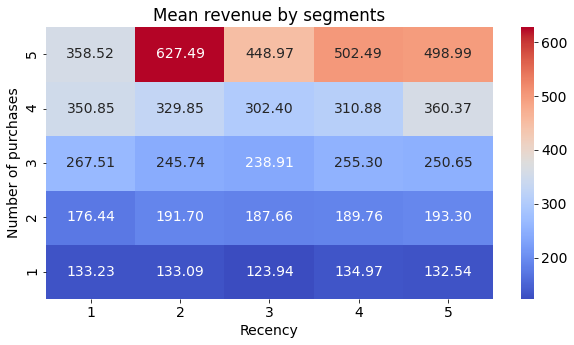

In [43]:
#визуализируем с помощью тепловой карты
plt.figure(figsize=(10,5))
sns.heatmap(rfm_table, annot=True, fmt='.2f' ,cmap='coolwarm')
plt.title('Mean revenue by segments')
plt.xlabel('Recency')
plt.ylabel('Number of purchases')
plt.gca().invert_yaxis()
plt.show()

Глядя на тепловую карту, можно определить кластеры покупателей - всего получается 25 уникальных кластеров, объединим некоторые.  

В левом нижнем углу расположены клиенты, у которых меньше всех покупок, и которые покупали очень давно, скорее всего эти клиенты уже потеряны - "lost clients"  
R=1-2, F=3-4 - клиенты, которые покупали достаточно много, но давно, это покупатели в зоне риска "at risk zone"  
R=1-2, F=5 - клиенты, купившие очень много товаров, но давно - таких клиентов нельзя терять, можно предложить им бонусы/лояльную программу "need more attention"  
R=3, F=1-5 - не так давно покупавшие клиенты, их также нужно стимулировать к покупкам "perspective client"  
R=4-5, F=1-4 - постоянные покупатели "regular clients"  
В правом верхнем углу расположены клиенты, покупающие много и часто - "best of the best" 

In [44]:

segm_map = {
    r'[1-2][1-2]' : 'lost clients',
    r'[1-2][3-4]' : 'at risk zone',
    r'[1-2]5' :'need more attention',
    r'3[1-5]' : 'perspective client',
    r'[4-5][1-4]' : 'regular clients',
    r'[4-5]5' : 'best of the best'}
rfm_df['segment'] = rfm_df['R'].astype(str)+rfm_df['F'].astype(str)
rfm_df['segment'] =rfm_df['segment'].replace(segm_map, regex=True)

In [45]:
rfm_df

,customer_unique_id,recency,frequency,monetary,R,M,F,RFMScore,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,117.0,1,129.90,4,4,1,414,regular clients
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119.0,1,18.90,4,1,1,411,regular clients
2,0000f46a3911fa3c0805444483337064,542.0,1,69.00,1,2,1,112,lost clients
3,0000f6ccb0745a6a4b88665a16c9f078,326.0,1,25.99,2,1,1,211,lost clients
4,0004aac84e0df4da2b147fca70cf8255,293.0,1,180.00,2,5,1,215,lost clients
...,...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,452.0,2,1570.00,1,5,2,125,lost clients
95416,fffea47cd6d3cc0a88bd621562a9d061,267.0,1,64.89,3,2,1,312,perspective client
95417,ffff371b4d645b6ecea244b27531430a,574.0,1,89.90,1,3,1,113,lost clients
95418,ffff5962728ec6157033ef9805bacc48,125.0,1,115.00,4,4,1,414,regular clients


In [46]:
#посмотрим, сколько покупателей в каждом сегменте
rfm_segments = rfm_df\
.groupby('segment', as_index=False)\
.agg({'customer_unique_id': 'count'})\
.sort_values('customer_unique_id')
rfm_segments

,segment,customer_unique_id
3,need more attention,194
1,best of the best,270
0,at risk zone,947
4,perspective client,19171
2,lost clients,36914
5,regular clients,37924
